* pca
    * https://ysyblog.tistory.com/123
    * https://m.blog.naver.com/tjdrud1323/221720259834

* FA
    * https://insightcampus.co.kr/2022/01/17/python%EC%9C%BC%EB%A1%9C-%ED%95%98%EB%8A%94-%EC%9A%94%EC%9D%B8-%EB%B6%84%EC%84%9D/
    * https://ysyblog.tistory.com/124

* LLE, MDS 
    * https://lovit.github.io/nlp/representation/2018/09/28/mds_isomap_lle/

### 차원축소

PCA(주성분분석)

LLE

Factor Analysis

MDS(다차원척도법)

# PCA

* 고차원의 데이터를 저차원의 데이터로 축소시키는 기법
* 데이터를 어떤 기준을 바탕으로 변황을 하고, 그 변환으로 인해 '주성분'이 추출된다.
* 따라서 추출된 주성분은 원래의 데이터와 다르다. 그렇기 때문에 변수의 의미가 중요한 경우에는 PCA를 사용하면 안된다.

In [1]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리 
x = df.drop(['target'], axis=1).values # 독립변인들의 value값만 추출
y = df['target'].values # 종속변인 추출

x = StandardScaler().fit_transform(x) # x객체에 x를 표준화한 데이터를 저장

features = ['sepal length', 'sepal width', 'petal length', 'petal width']
pd.DataFrame(x, columns=features).head()

# pca를 하기 전에 데이터 스케일링을 하는 이유는 데이터의 스케일에 따라 주성분의 설명 가능한 분산량이 달라질 수 있기 때문이다. 

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


### pca 수행

In [3]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=4) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(x)

result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in range(x.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,2.930354,0.727705,0.727705
pca2,0.927404,0.230305,0.958010
pca3,0.148342,0.036838,0.994848
pca4,0.020746,0.005152,1.000000


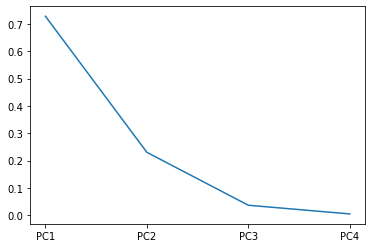

In [4]:
import matplotlib.pyplot as plt

ax = plt.plot(['PC1','PC2','PC3','PC4'], pca.explained_variance_ratio_)
plt.show()

위와 같이 각 주성분의 고윳값과 주성분 마다 기여율을 누적한 누적 기여율을 계산한 데이터 프레임이 완성되었다. 

여기서 개별 고윳값 즉, 각 주성분 마다 고윳값이 0.7이상인 주성분들, 누적기여율이 80% 이상이 넘어거지는 지점까지의 주성분들을 기준으로 하여 적절한 주성분 개수를 설정한다. 

이 예제에서는 누적기여율이 80%이상이 넘어가는 순간인 2개로 주성분 갯수를 설정한다.

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2'])
# 주성분으로 이루어진 데이터 프레임 구성

principalDf.head()

,principal component1,principal component2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


### 시각화

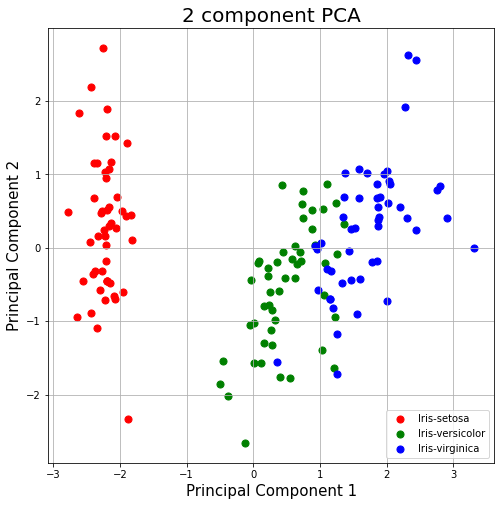

In [9]:
import matplotlib.pyplot as plt

finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize=20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component1']
               , finalDf.loc[indicesToKeep, 'principal component2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

https://ysyblog.tistory.com/124

# Factor Analysis

### 탐색적 요인 분석
* 요인 분석 (FA)은 관찰 된 변수 집합에서 영향력있는 기본 요인 또는 잠재 변수를 검색하는 데 사용되는 탐색적 데이터 분석 방법이다.

* 변수 수를 줄여 데이터 해석에 도움을 준다.

* 모든 변수에서 최대 공분산을 추출하여 공통 점수에 넣는다.

* 요인 분석은 시장 조사, 광고, 심리학, 금융 및 운영 연구에 널리 사용됨.

* 예를 들어, 시장 조사원은 요인 분석을 사용하여 가격에 민감한 고객을 식별하고 소비자 선택에 영향을 미치는 브랜드 기능을 식별하며 유통 채널에 대한 채널 선택 기준을 이해하는 데 도움을 준다.

### 탐색적 요인 분석의 전제조건
* 등간척도, 정규분포, 관찰치가 상호독립적이며 분산이 동일해야한다.
  
* 모상관 행렬이 단위 행렬이라는 가설이 기각되어야함(KMO / Bartleet의 검정)
  
* 최초 요인 추출 단계에서 얻은 고유치를 scree chart로 표현했을 때, 한군데 이상 꺾이는 곳이 있어야함.
  
* 변수간에 높은 상관관계가 있어야한다.(상관관계가 높은 변수들끼리 그룹화 하는 것이기 때문)

### 탐색적 요인 분석 방법
* 변수간의 상관행렬로부터 공통요인을 도출한다.
  
* 도출된 공통요인을 이용해서 변수간의 상관관계를 설명한다.
  
* 요인부하량(factor loading)은 ±0.3 이상이면 유의하다고 본다.

### 탐색적 요인 분석의 목적
* 자료의 요약 : 변수들을 몇개의 공통된 변인으로 묶는다.
  
* 측정도구 타당성 검정 : 변인들이 동일한 요인으로 묶이는지를 확인.
  
* 변인구조 파악 : 변수들의 상호관계를 파악한다.
  
* 불필요한 변인 제거 : 중요도나 설명력이 낮은 변수를 제거한다.
  
* 회귀분석이나 판별분석의 설명변수 선택

### PCA(주성분분석)과의 차이점
* PCA 성분은 최대 분산 량을 설명하는 반면 요인 분석은 데이터의 공분산을 설명한다.
  
* PCA 구성 요소는 서로 완전히 직교하는 반면 요인 분석에서는 요인이 꼭 직교하는 것은 아니다.
  
* PCA 성분은 관찰 된 변수의 선형 조합이지만, FA에서 관찰 된 변수는 관찰되지 않은 변수 또는 요인의 선형 조합이다.
  
* PCA 구성 요소는 해석 할 수 없지만, FA에서 기본 요소는 라벨링 및 해석할 수 있다.
  
* PCA는 일종의 차원 감소 방법이며 요인 분석은 잠재 변수 방법이다.
  
* PCA는 관찰이지만 FA는 모델링 기술이다.

In [1]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/psych/bfi.csv', index_col=0)
df.columns

df.drop(['gender', 'education', 'age'],axis=1,inplace=True)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2436 entries, 61617 to 67560
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      2436 non-null   float64
 1   A2      2436 non-null   float64
 2   A3      2436 non-null   float64
 3   A4      2436 non-null   float64
 4   A5      2436 non-null   float64
 5   C1      2436 non-null   float64
 6   C2      2436 non-null   float64
 7   C3      2436 non-null   float64
 8   C4      2436 non-null   float64
 9   C5      2436 non-null   float64
 10  E1      2436 non-null   float64
 11  E2      2436 non-null   float64
 12  E3      2436 non-null   float64
 13  E4      2436 non-null   float64
 14  E5      2436 non-null   float64
 15  N1      2436 non-null   float64
 16  N2      2436 non-null   float64
 17  N3      2436 non-null   float64
 18  N4      2436 non-null   float64
 19  N5      2436 non-null   float64
 20  O1      2436 non-null   float64
 21  O2      2436 non-null   int64  


#### 요인성 평가
* 요인 분석을 수행하기 전에 데이터 세트의 요인성을 평가해야한다. Factorability는 데이터 세트에서 요인을 찾을 수 있는지를 확인하는 것이다.
  
* 인수 분해성 또는 샘플링 적절성을 확인하는 방법에는 아래와 같이 두 가지 방법이 있다.

#### 1. Bartlett의 테스트

In [2]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value
# (18170.966350869236, 0.0)

(18146.06557723504, 0.0)

* p-value가 0이므로 탐색적 요인분석에 적합한 데이터라고 할 수 있다.

#### 2. Kaiser-Meyer-Olkin (KMO)검정
* 관측 된 각 변수와 전체 모델에 대한 적절성을 결정한다.
  
* KMO는 관측 된 모든 변수 간의 분산 비율을 추정한다.
  
* Bartlett와 달리 p값이 없기 때문에 판단의 기준이 따로 있다.
  
* 0.6 미만의 KMO 값은 부적절한 것으로 간주되며 0.8이상이면 우수하다고 할 수 있다.
  
* 다만 KMO test를 하려면 변수가 최소한 3개 이상이어야 한다.

In [3]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model
# 0.848539722194922

0.8486452309468394

* KMO값이 0.85이므로 우수하다고 할 수 있다.

### 요인 수 선택

In [4]:
fa = FactorAnalyzer(n_factors=25,rotation=None)
fa.fit(df)
#Eigen값 체크 
ev, v = fa.get_eigenvalues()
ev

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

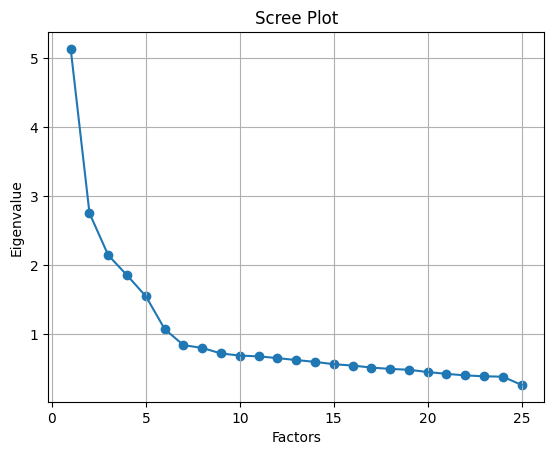

In [5]:
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

* Eigen값이 1이상일때 까지 or 그래프 기울기가 완만해지기 전까지 나누어야 데이터 결함을 최소화 할 수 있다.
  
* 위와 같은 경우 6개로 나누어주는 것이 최선이다.

### FA 실시

In [6]:
fa = FactorAnalyzer(n_factors=6, rotation="varimax") #ml : 최대우도 방법
fa.fit(df)
efa_result= pd.DataFrame(fa.loadings_, index=df.columns)
efa_result

,0,1,2,3,4,5
A1,0.095220,0.040783,0.048734,-0.530987,-0.113057,0.161216
A2,0.033131,0.235538,0.133714,0.661141,0.063734,-0.006244
A3,-0.009621,0.343008,0.121353,0.605933,0.033990,0.160106
A4,-0.081518,0.219717,0.235140,0.404594,-0.125338,0.086356
A5,-0.149616,0.414458,0.106382,0.469698,0.030977,0.236519
C1,-0.004358,0.077248,0.554582,0.007511,0.190124,0.095035
C2,0.068330,0.038370,0.674545,0.057055,0.087593,0.152775
C3,-0.039994,0.031867,0.551164,0.101282,-0.011338,0.008996
C4,0.216283,-0.066241,-0.638475,-0.102617,-0.143846,0.318359
C5,0.284187,-0.180812,-0.544838,-0.059955,0.025837,0.132423


<AxesSubplot:>

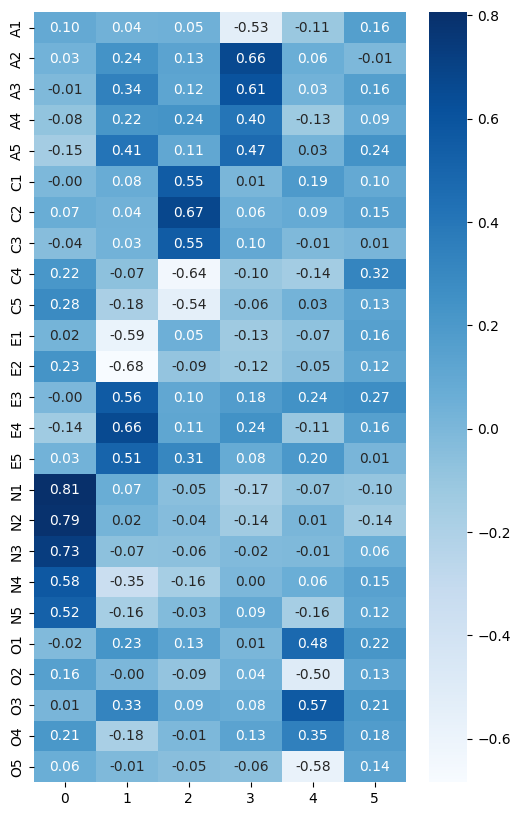

In [8]:
import seaborn as sns
plt.figure(figsize=(6,10))
sns.heatmap(efa_result, cmap="Blues", annot=True, fmt='.2f')

요인 0는 N1, N2, N3, N4 및 N5에 대해 높은 요인 적재량을 가진다.

요인 1는 E1, E2, E3, E4 및 E5에 대해 높은 요인 적재량을 가진다.

요인 2에는 C1, C2, C3, C4 및 C5에 대해 높은 요인 적재량을 가진다.

요인 3에는 A1, A2, A3, A4 및 A5에 대해 높은 요인 적재량을 가진다.

요인 4에는 O1, O2, O3, O4 및 O5 에 대해 높은 요인 적재량을 가진다.

요인 5에는 변수에 대해 높은 요인 적재량이 없다고 해석할 수 있다. 따라서 위의 5 가지 요소만 활용하는 것이 좋다.

#### 5개 요인으로 분석

In [9]:
fa = FactorAnalyzer(n_factors=5, rotation="varimax") #ml : 최대우도 방법
fa.fit(df)
# FactorAnalyzer(n_factors=5, rotation='varimax', rotation_kwargs={})

fa.get_factor_variance()
df1 = pd.DataFrame(fa.get_factor_variance())
#행, 열 이름 설정
df1.index = ['SS Loadings', 'Proportion Var','Cumulative Var']
df1

,0,1,2,3,4
SS Loadings,2.709633,2.473090,2.041106,1.844498,1.522153
Proportion Var,0.108385,0.098924,0.081644,0.073780,0.060886
Cumulative Var,0.108385,0.207309,0.288953,0.362733,0.423619


### 신뢰도 계수(크론바흐 알파계수) 확인

In [16]:
# 신롸도 계수를 구하는 함수
import numpy as np
def CronbachAlpha(itemscores):
    itemscores = np.asarray(itemscores)
    itemvars = itemscores.var(axis=0, ddof=1)
    tscores = itemscores.sum(axis=1)
    nitems = itemscores.shape[1]
    return (nitems / (nitems-1)) * (1 - (itemvars.sum() / tscores.var(ddof=1)))

In [17]:
factors = ['A', 'C', 'E', 'N', 'O']
factors_items_dict = {}
for factor in factors:
    factors_items_dict[factor] = [x for x in df.columns if x[0] == factor]

factors_items_dict

{'A': ['A1', 'A2', 'A3', 'A4', 'A5'],
 'C': ['C1', 'C2', 'C3', 'C4', 'C5'],
 'E': ['E1', 'E2', 'E3', 'E4', 'E5'],
 'N': ['N1', 'N2', 'N3', 'N4', 'N5'],
 'O': ['O1', 'O2', 'O3', 'O4', 'O5']}

In [18]:
for key, value in factors_items_dict.items():  
    print(key)  
    print(CronbachAlpha(df[value]))  
    print()

A
0.4437533019387808

C
-0.31628341382240494

E
-0.6552429584732491

N
0.8169468842774033

O
-0.176098107937655



N과 A정도가 신뢰도가 높다고 할 수 있다.

## MDS(Multi Dimensional Scaling)

* 군집분석과 같이 개체들을 대상으로 변수들을 측정한 후, 개체들 사이의 유사성/비유사성을 측정하여 개체들을 2차원 또는 3차원 공간상에서 점으로 표현하는 분석법
* 여러 대상 간의 거리가 주어져 있을 때, 대상들을 동일한 상대적 거리를 가진 실수공간의 점들로 배치시키는 방법
* 개체들을 2차원 또는 3차원 공간상에 점으로 표현하여 개체들 사이의 집단화를 시각적으로 표현하는 분석 방법

* 목적
  * 데이터 속에 잠재해 있는 패턴, 구조를 찾아서 기하학적으로 표현
* 방법
  * 개체들의 거리 계산은 유클리드 거리행렬을 활용
  * 관측대상들의 상대적 거리의 정확도를 높이기 위해 적합 정도를 스트레스 값으로 표현
* 종류
  * 계량적 MDS
    * 데이터가 구간척도나 비율척도인 경우 활용
  * 비계량적 MDS
    * 데이터가 순서척도인 경우 활용,
    * 개체들 간의 거리가 순서로 주어진 경우에는 순서척도를 거리의 속성과 같도록 변환하여 거리를 생성한 후 적용

In [ ]:
from sklearn.manifold import MDS

y = MDS(n_components=2).fit_transform(x) # x: numpy.ndarray